<a href="https://colab.research.google.com/github/macroworkz/main/blob/main/Copy_of_distfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**distfit** is a python package for *probability density fitting* of univariate distributions on non-censored data. With the Residual Sum of Squares (RSS) we determine the best fit across 89 theoretical distributions for which the best fitted theoretical distribution is returned with the loc, scale, arg parameters. The probability of new data-points can then be assed for significance.

* [API Documentation](https://erdogant.github.io/distfit/)
* [Github]( https://github.com/erdogant/distfit)


In [3]:
!pip install -U distfit
import distfit
print(distfit.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1.4.5


In [4]:
import pandas as pd
import numpy as np
from distfit import distfit

from google.colab import drive
drive.mount('/content/drive')


## Make example dataset

In [5]:
X = np.random.normal(0, 2, 5000)
y = [-8,-6,0,1,2,3,4,5,6]

X=pd.read_excel(open('/content/drive/MyDrive/ferf.xlsx', 'rb'),sheet_name='markov')

In [19]:
Y=X.loc[X['Yıl'] == 2018]["Dolar Değeri"]/20000
Y.head()

0       3.52550
1    1243.07625
2      16.56260
3       2.33280
4      32.45405
Name: Dolar Değeri, dtype: float64

In [21]:
# Initialize model with default parameters
dist = distfit(todf=True)
Z=np.log(Y)
# Fit on data
model = dist.fit_transform(Z)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0538149] [loc=2.662 scale=1.801]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0900613] [loc=0.000 scale=2.661]
[distfit] >[pareto    ] [1.82 sec] [RSS: 0.428691] [loc=-1.347 scale=1.347]
[distfit] >[dweibull  ] [0.96 sec] [RSS: 0.0604374] [loc=2.601 scale=1.584]
[distfit] >[t         ] [1.35 sec] [RSS: 0.0537814] [loc=2.632 scale=1.755]
[distfit] >[genextreme] [1.09 sec] [RSS: 0.0319278] [loc=1.814 scale=1.417]
[distfit] >[gamma     ] [0.63 sec] [RSS: 0.0200868] [loc=-0.151 scale=1.380]
[distfit] >[lognorm   ] [1.36 sec] [RSS: 0.0287579] [loc=-1.510 scale=3.797]
[distfit] >[beta      ] [1.19 sec] [RSS: 0.00687871] [loc=-0.016 scale=12.651]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.361517] [loc=0.000 scale=12.575]
[distfit] >[loggamma  ] [1.27 sec] [RSS: 0.0539218] [loc=-567.032 scale=76.317]
[distfit] >Compute confidence interval [parametric]


## Plotting

In [22]:
dist.model

{'distr': <scipy.stats._continuous_distns.beta_gen at 0x7f2ddc7a60d0>,
 'stats': 'RSS',
 'params': (1.3976486327158981,
  5.2527282042803405,
  -0.016234246007876135,
  12.65116356447701),
 'name': 'beta',
 'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f2dd8cd46d0>,
 'score': 0.006878714706521871,
 'loc': -0.016234246007876135,
 'scale': 12.65116356447701,
 'arg': (1.3976486327158981, 5.2527282042803405),
 'CII_min_alpha': 0.3168518755029357,
 'CII_max_alpha': 6.265504317240661}

[distfit] >plot..
[distfit] >Generate 1000 beta distributed samples with fitted params (1.3976486327158981, 5.2527282042803405, -0.016234246007876135, 12.65116356447701).


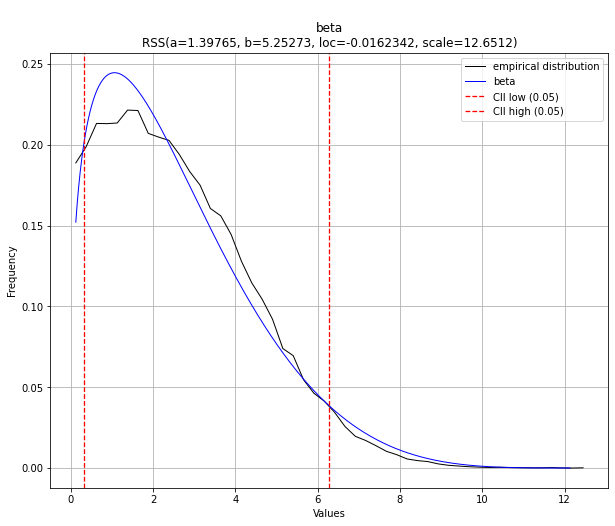

In [23]:
# Make plot
dist.plot()
Xgenerate = dist.generate(n=1000)

## Predictions on new data

In [24]:
# Make prediction on new data
results = dist.predict(Xgenerate)

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]


[distfit] >plot..
[distfit] >plot summary..


(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2dd6886110>)

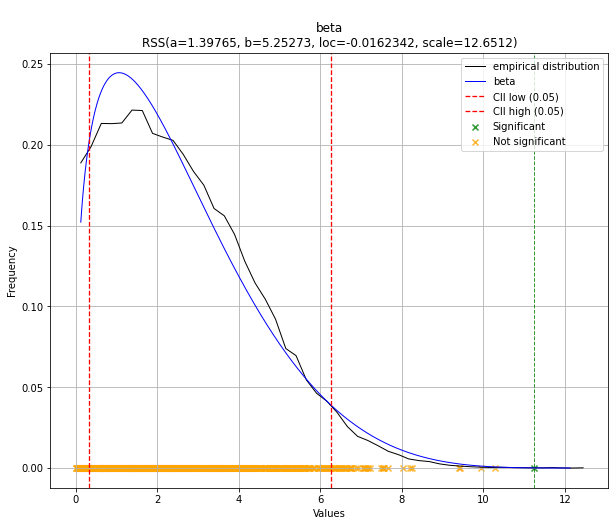

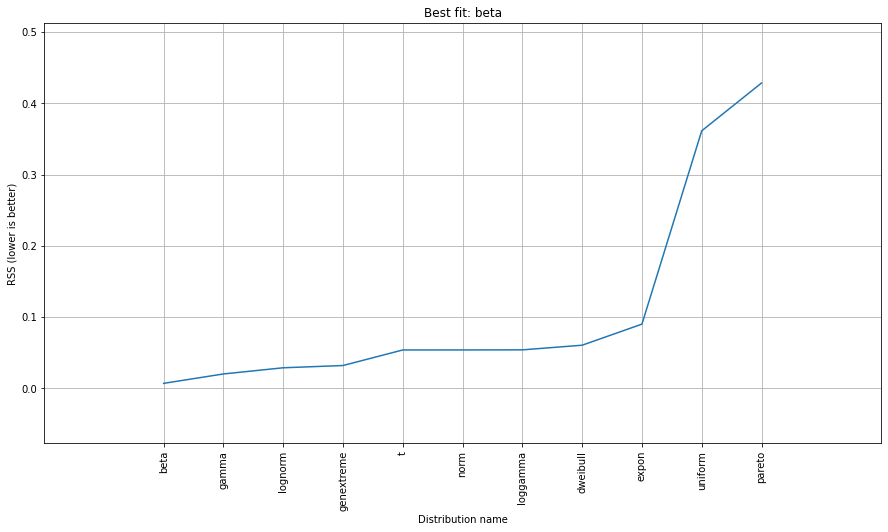

In [25]:
# plot predictions
dist.plot()
dist.plot_summary()

In [26]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

    

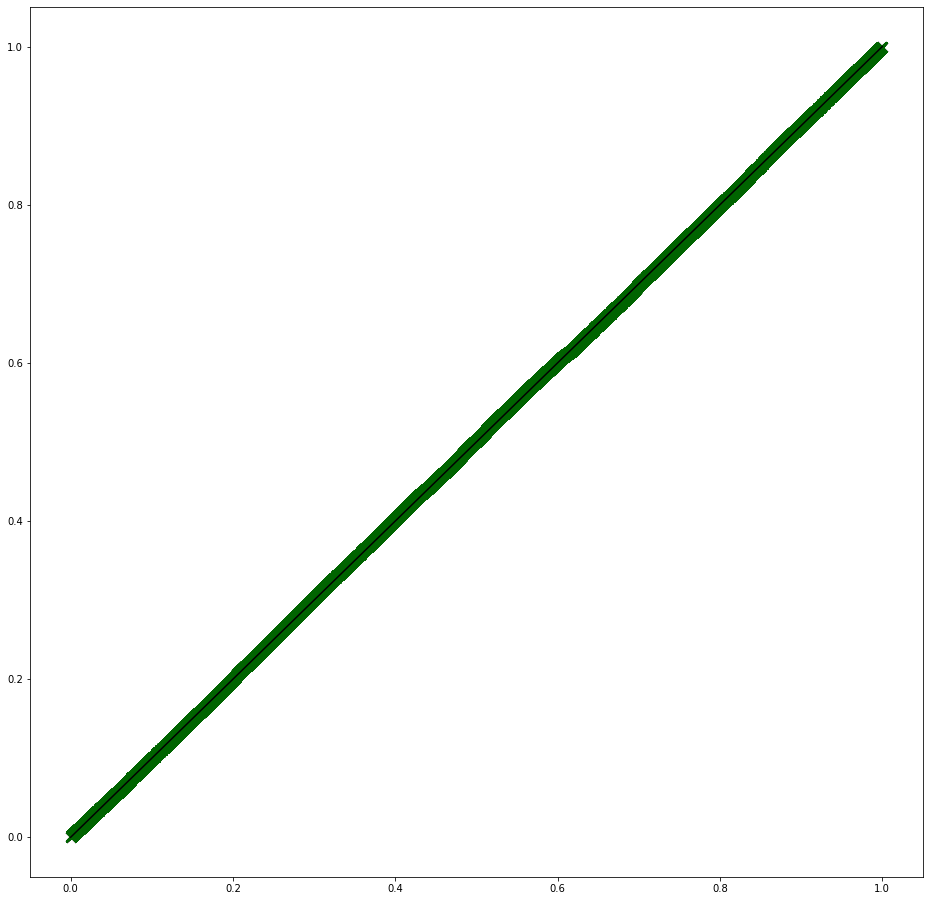

In [52]:

from matplotlib import pyplot as plt
%matplotlib inline

F=Z[:].to_numpy()
gini(F)
def lorenz_curve(X):
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    X_lorenz[0], X_lorenz[-1]
    fig, ax = plt.subplots(figsize=[16,16])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               marker='x', color='darkgreen', s=100)
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')
lorenz_curve(F)